# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 5


## Definiciones

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
VALIDATION_SIZE = 0.2

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
def create_model(dropout_rate_conv=0.0, dropout_rate_dense=0.0):
    model = models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

    if dropout_rate_conv > 0:
        model.add(layers.Dropout(dropout_rate_conv))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    
    if dropout_rate_dense > 0:
        model.add(layers.Dropout(dropout_rate_dense))
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))
    
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    return model

In [5]:
def create_data_augmentation_model():
    img_height = 32
    img_width = 32

    dataAugmentation = models.Sequential()
    dataAugmentation.add(Input(shape=(img_height, img_width, 3)))
    dataAugmentation.add(layers.RandomFlip("horizontal"))
    dataAugmentation.add(layers.RandomRotation(0.1))
    dataAugmentation.add(layers.RandomZoom(0.1))

    return dataAugmentation

## Ejercicio 1

In [5]:
model = create_model()
history = model.fit(train_images, train_labels, epochs=10, validation_split=VALIDATION_SIZE)

Epoch 1/10
1250/1250 [==============================] - 48s 37ms/step - loss: 1.6253 - accuracy: 0.3914 - val_loss: 1.3533 - val_accuracy: 0.5045
Epoch 2/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.2163 - accuracy: 0.5594 - val_loss: 1.0751 - val_accuracy: 0.6191
Epoch 3/10
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0030 - accuracy: 0.6446 - val_loss: 1.0043 - val_accuracy: 0.6456
Epoch 4/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8552 - accuracy: 0.6992 - val_loss: 0.8856 - val_accuracy: 0.6875
Epoch 5/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.7424 - accuracy: 0.7410 - val_loss: 0.9068 - val_accuracy: 0.6818
Epoch 6/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.6560 - accuracy: 0.7708 - val_loss: 0.8464 - val_accuracy: 0.7112
Epoch 7/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.5745 - accuracy: 0.7994 - val_loss: 0.8415 -

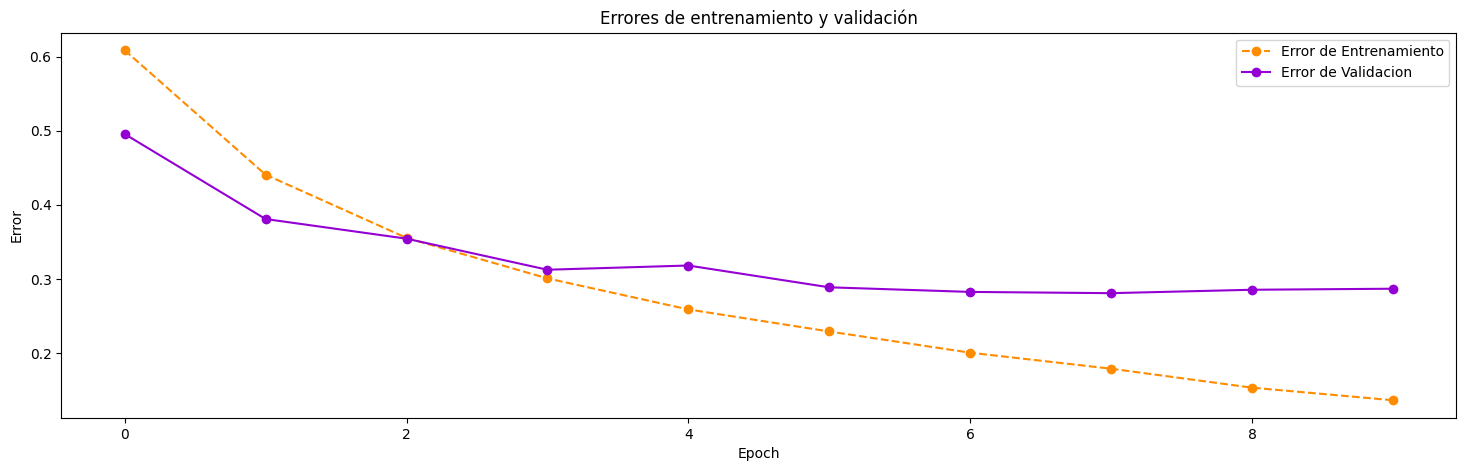

313/313 - 2s - loss: 0.9600 - accuracy: 0.7079 - 2s/epoch - 8ms/step
Error Test Modelo Final: 0.2921000123023987


In [6]:
plt.figure(figsize=(18, 5))
plt.plot(1 - np.array(history.history['accuracy']), c='darkorange', label='Error de Entrenamiento', marker='o', linestyle="--")
plt.plot(1 - np.array(history.history['val_accuracy']), c='darkviolet', label='Error de Validacion', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Error Test Modelo Final: {1 - test_acc}")

Podemos observar que, en épocas más avanzadas, parece comenzar a ocurrir un leve overfitting, evidenciado por la disminución del error de entrenamiento y el estancamiento del error de validación.

## Ejercicio 2

In [7]:
dropout_rates = [(0.2, 0.0), (0.5, 0.0), (0.2, 0.2), (0.2, 0.5), (0.5, 0.2), (0.5, 0.5)]
histories = []
tests_error = []

for (dropout_rate_conv, dropout_rate_dense) in dropout_rates:
    model = create_model(dropout_rate_conv, dropout_rate_dense)
    history = model.fit(train_images, train_labels, epochs=20, validation_split=VALIDATION_SIZE)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    tests_error.append(1 - test_acc)
    histories.append(history)

Epoch 1/20
1250/1250 [==============================] - 47s 37ms/step - loss: 1.6144 - accuracy: 0.4010 - val_loss: 1.3051 - val_accuracy: 0.5277
Epoch 2/20
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1888 - accuracy: 0.5738 - val_loss: 1.1492 - val_accuracy: 0.5940
Epoch 3/20
1250/1250 [==============================] - 47s 38ms/step - loss: 1.0033 - accuracy: 0.6440 - val_loss: 0.9924 - val_accuracy: 0.6422
Epoch 4/20
1250/1250 [==============================] - 46s 37ms/step - loss: 0.8868 - accuracy: 0.6848 - val_loss: 0.8973 - val_accuracy: 0.6839
Epoch 5/20
1250/1250 [==============================] - 46s 37ms/step - loss: 0.7850 - accuracy: 0.7235 - val_loss: 0.8866 - val_accuracy: 0.6932
Epoch 6/20
1250/1250 [==============================] - 48s 38ms/step - loss: 0.7074 - accuracy: 0.7492 - val_loss: 0.8509 - val_accuracy: 0.7040
Epoch 7/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.6438 - accuracy: 0.7743 - val_loss: 0.8774 -

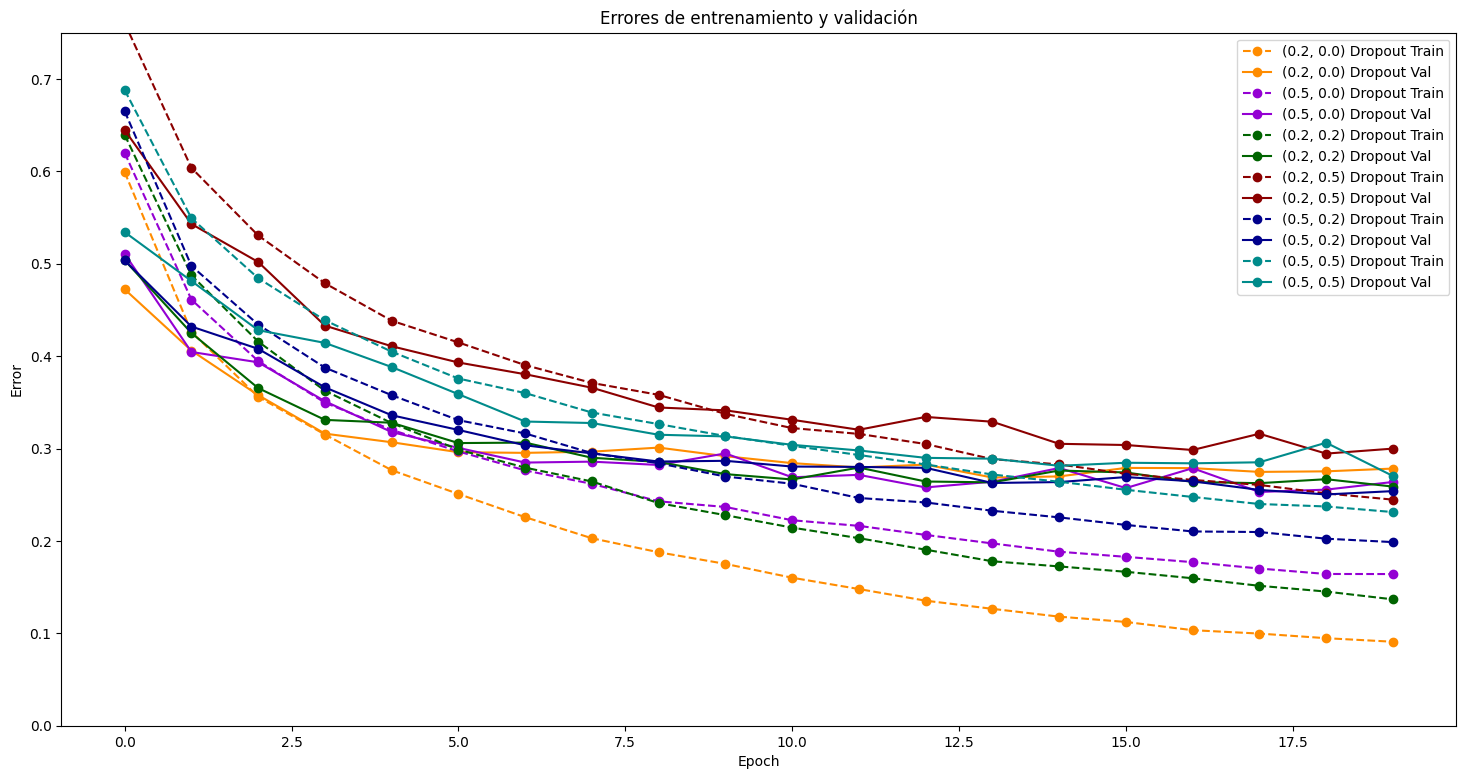

Error Test Modelo (0.2, 0.0) Dropout: 0.2777000069618225
Error Test Modelo (0.5, 0.0) Dropout: 0.25999999046325684
Error Test Modelo (0.2, 0.2) Dropout: 0.265999972820282
Error Test Modelo (0.2, 0.5) Dropout: 0.31040000915527344
Error Test Modelo (0.5, 0.2) Dropout: 0.26179999113082886
Error Test Modelo (0.5, 0.5) Dropout: 0.2732999920845032


In [8]:
plt.figure(figsize=(18, 9))
plt.plot(1 - np.array(histories[0].history['accuracy']), c='darkorange', label=f'{dropout_rates[0]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[0].history['val_accuracy']), c='darkorange', label=f'{dropout_rates[0]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[1].history['accuracy']), c='darkviolet', label=f'{dropout_rates[1]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[1].history['val_accuracy']), c='darkviolet', label=f'{dropout_rates[1]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[2].history['accuracy']), c='darkgreen', label=f'{dropout_rates[2]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[2].history['val_accuracy']), c='darkgreen', label=f'{dropout_rates[2]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[3].history['accuracy']), c='darkred', label=f'{dropout_rates[3]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[3].history['val_accuracy']), c='darkred', label=f'{dropout_rates[3]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[4].history['accuracy']), c='darkblue', label=f'{dropout_rates[4]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[4].history['val_accuracy']), c='darkblue', label=f'{dropout_rates[4]} Dropout Val', marker='o', linestyle="-")
plt.plot(1 - np.array(histories[5].history['accuracy']), c='darkcyan', label=f'{dropout_rates[5]} Dropout Train', marker='o', linestyle="--")
plt.plot(1 - np.array(histories[5].history['val_accuracy']), c='darkcyan', label=f'{dropout_rates[5]} Dropout Val', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.ylim([0, 0.75])

plt.show()

print(f"Error Test Modelo {dropout_rates[0]} Dropout: {tests_error[0]}")
print(f"Error Test Modelo {dropout_rates[1]} Dropout: {tests_error[1]}")
print(f"Error Test Modelo {dropout_rates[2]} Dropout: {tests_error[2]}")
print(f"Error Test Modelo {dropout_rates[3]} Dropout: {tests_error[3]}")
print(f"Error Test Modelo {dropout_rates[4]} Dropout: {tests_error[4]}")
print(f"Error Test Modelo {dropout_rates[5]} Dropout: {tests_error[5]}")

Evaluando todas las combinaciones, el mejor resultado lo obtenemos con una sola capa de dropout de 0.5 después de la última capa convolucional. El modelo con una capa de 0.2 en los filtros y otra de 0.5 en las densas parece tener el peor desempeño. </br>
Esto tiene sentido, ya que se pierde más información al obtener las generalidades y no en los detalles. Es notable que, con una mayor cantidad de dropout, se necesita una mayor cantidad de épocas. </br>
Sin embargo, estas capas parecen ser herramientas útiles para evitar el overfitting y así mejorar el error de test final.

## Ejercicio 3

In [9]:
model2 = create_model(0.5, 0.0)

In [10]:
model3 = create_data_augmentation_model()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10))

model3.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [11]:
history2 = model2.fit(train_images, train_labels, epochs=20, validation_split=VALIDATION_SIZE)

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels, verbose=2)
error2 = 1 - test_acc2

history3 = model3.fit(train_images, train_labels, epochs=20, validation_split=VALIDATION_SIZE)

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels, verbose=2)
error3 = 1 - test_acc3

Epoch 1/20
1250/1250 [==============================] - 45s 36ms/step - loss: 1.6457 - accuracy: 0.3863 - val_loss: 1.3203 - val_accuracy: 0.5117
Epoch 2/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.2384 - accuracy: 0.5506 - val_loss: 1.1253 - val_accuracy: 0.5969
Epoch 3/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.0594 - accuracy: 0.6216 - val_loss: 1.0053 - val_accuracy: 0.6446
Epoch 4/20
1250/1250 [==============================] - 44s 36ms/step - loss: 0.9530 - accuracy: 0.6625 - val_loss: 0.9698 - val_accuracy: 0.6543
Epoch 5/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8730 - accuracy: 0.6930 - val_loss: 0.9042 - val_accuracy: 0.6755
Epoch 6/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8071 - accuracy: 0.7169 - val_loss: 0.8728 - val_accuracy: 0.6936
Epoch 7/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7520 - accuracy: 0.7362 - val_loss: 0.8089 -

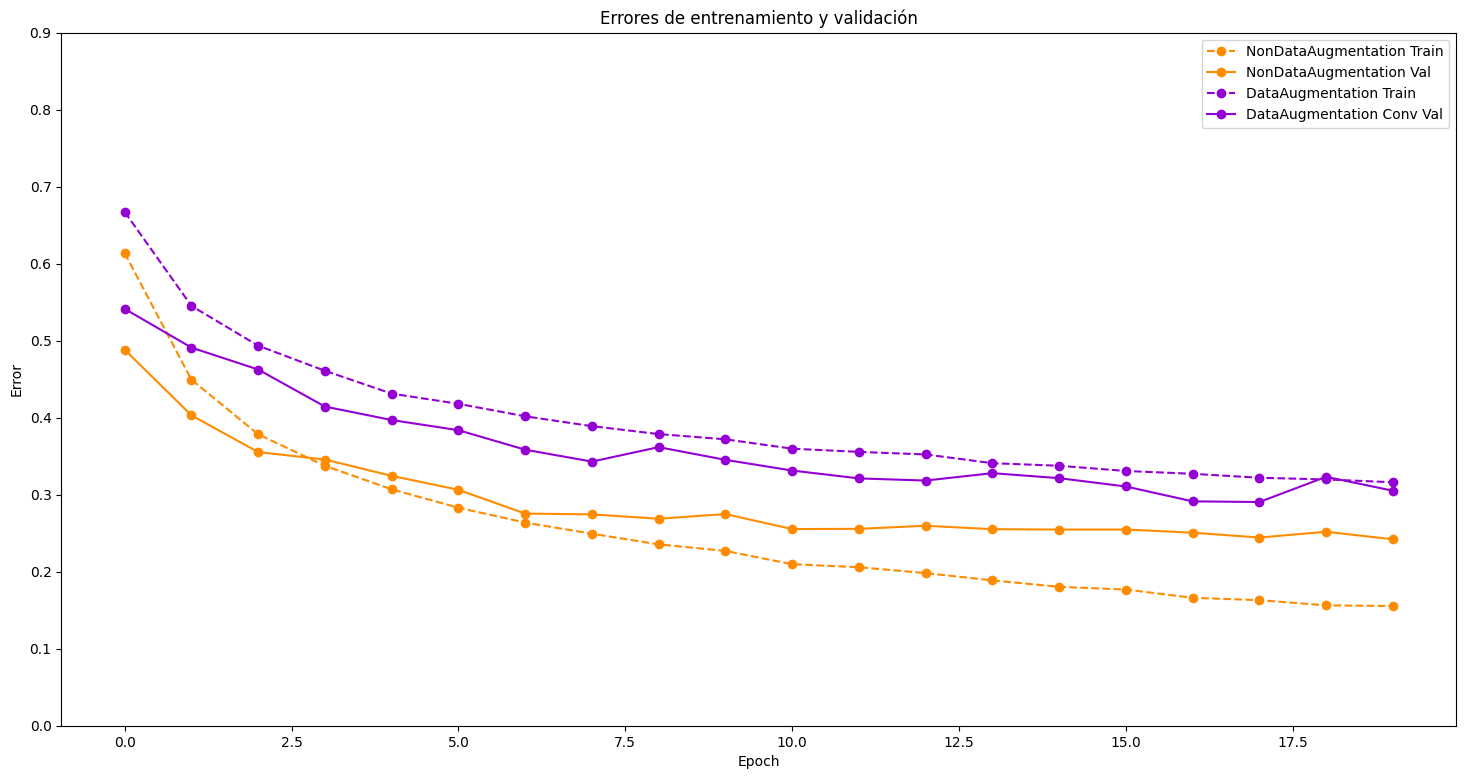

Error Test Modelo NonDataAugmentation: 0.2498999834060669
Error Test Modelo DataAugmentation: 0.3130999803543091


In [12]:
plt.figure(figsize=(18, 9))
plt.plot(1 - np.array(history2.history['accuracy']), c='darkorange', label='NonDataAugmentation Train', marker='o', linestyle="--")
plt.plot(1 - np.array(history2.history['val_accuracy']), c='darkorange', label='NonDataAugmentation Val', marker='o', linestyle="-")
plt.plot(1 - np.array(history3.history['accuracy']), c='darkviolet', label='DataAugmentation Train', marker='o', linestyle="--")
plt.plot(1 - np.array(history3.history['val_accuracy']), c='darkviolet', label='DataAugmentation Conv Val', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.ylim([0, 0.9])

plt.show()

print(f"Error Test Modelo NonDataAugmentation: {error2}")
print(f"Error Test Modelo DataAugmentation: {error3}")


Podemos observar que con data augmentation no logra aprender bien, evidenciado por el alto error de entrenamiento y un error de validación aún más elevado. El error de test tampoco es satisfactorio. </br>
Aun así, el data augmentation es una estrategia para evitar el overfitting; tal vez con una mayor cantidad de épocas y filtros funcione mejor.


## Ejercicio 4

In [13]:
def getBestModel():
    bestModel = models.Sequential()
    bestModel.add(Input(shape=(32, 32, 3)))
    bestModel.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.MaxPooling2D((2, 2)))
    bestModel.add(layers.Dropout(0.2))

    bestModel.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.MaxPooling2D((2, 2)))
    bestModel.add(layers.Dropout(0.3))

    bestModel.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    bestModel.add(layers.MaxPooling2D((2, 2)))
    bestModel.add(layers.Dropout(0.4))

    bestModel.add(layers.Flatten())
    bestModel.add(layers.Dense(128, activation='relu'))
    bestModel.add(layers.Dense(128, activation='relu'))
    bestModel.add(layers.Dense(64, activation='relu'))
    bestModel.add(layers.Dense(10))

    bestModel.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return bestModel

In [14]:
bestModel = getBestModel()
history = bestModel.fit(train_images, train_labels, epochs=20, validation_split=VALIDATION_SIZE)

test_loss, test_acc = bestModel.evaluate(test_images, test_labels, verbose=2)
bestError = 1 - test_acc

Epoch 1/20
1250/1250 [==============================] - 80s 63ms/step - loss: 1.7673 - accuracy: 0.3425 - val_loss: 1.4531 - val_accuracy: 0.4625
Epoch 2/20
1250/1250 [==============================] - 79s 63ms/step - loss: 1.3401 - accuracy: 0.5105 - val_loss: 1.1871 - val_accuracy: 0.5674
Epoch 3/20
1250/1250 [==============================] - 79s 63ms/step - loss: 1.1462 - accuracy: 0.5875 - val_loss: 1.0107 - val_accuracy: 0.6415
Epoch 4/20
1250/1250 [==============================] - 79s 63ms/step - loss: 1.0209 - accuracy: 0.6369 - val_loss: 0.9358 - val_accuracy: 0.6762
Epoch 5/20
1250/1250 [==============================] - 79s 63ms/step - loss: 0.9321 - accuracy: 0.6688 - val_loss: 0.8782 - val_accuracy: 0.6947
Epoch 6/20
1250/1250 [==============================] - 79s 63ms/step - loss: 0.8747 - accuracy: 0.6924 - val_loss: 0.7791 - val_accuracy: 0.7322
Epoch 7/20
1250/1250 [==============================] - 79s 63ms/step - loss: 0.8290 - accuracy: 0.7099 - val_loss: 0.8162 -

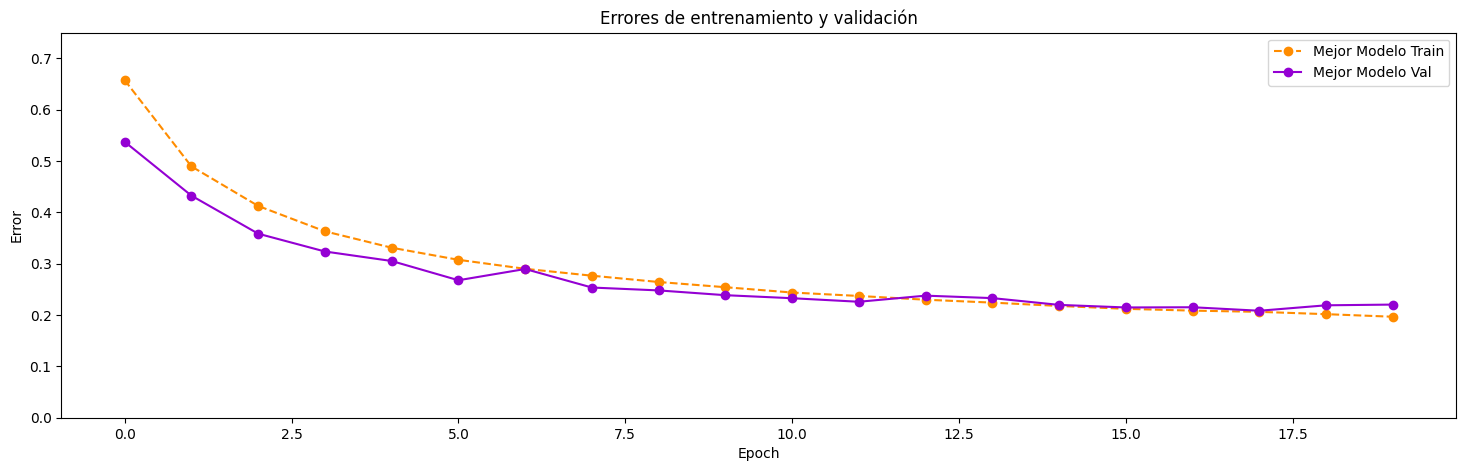

Error Test Mejor Modelo: 0.23180001974105835


In [15]:
plt.figure(figsize=(18, 5))
plt.plot(1 - np.array(history.history['accuracy']), c='darkorange', label='Mejor Modelo Train', marker='o', linestyle="--")
plt.plot(1 - np.array(history.history['val_accuracy']), c='darkviolet', label='Mejor Modelo Val', marker='o', linestyle="-")
plt.title('Errores de entrenamiento y validación')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc='upper right')

plt.ylim([0, 0.75])

plt.show()

print(f"Error Test Mejor Modelo: {bestError}")

Se me ocurrió agregar un filtro más de 128 para capturar más información. Sin embargo, esto puede hacer que el modelo se concentre demasiado en los detalles, resultando en overfitting. Por eso decidí colocar capas de dropout después de cada filtro, aumentando la intensidad del dropout a medida que crece el número de filtros. Así, el modelo se enfoca menos en los detalles y más en las generalidades. </br>
Además, pensé que sería mejor idea invertir las capas densas, disminuyendo progresivamente la cantidad de neuronas. Como posee una cantidad considerable de dropout, probablemente sea más conveniente utilizar más épocas para entrenar el modelo.

## Ejercicio 5

In [16]:
import tensorflow_similarity as tfsim
import tensorflow_similarity.visualization as tfsim_visualization
import tensorflow_similarity.losses as tfsim_losses

/home/pomina/Facu/IAA/IAA/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [17]:
CLASSES = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7]
NUM_CLASSES = 8
CLASSES_PER_BATCH = NUM_CLASSES
EXAMPLES_PER_CLASS = 10
STEPS_PER_EPOCH = 1000

sampler = tfsim.samplers.MultiShotMemorySampler(
    train_images,
    train_labels,
     classes_per_batch=CLASSES_PER_BATCH,
     examples_per_class_per_batch=EXAMPLES_PER_CLASS,
     class_list=CLASSES[:NUM_CLASSES]  # Only use the first 6 classes for training.
)


The initial batch size is 80 (8 classes * 10 examples per class) with 0 augmentations


indexing classes: 100%|██████████| 40000/40000 [00:00<00:00, 3385438.18it/s]


In [18]:
def get_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))

    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)
    x = tf.keras.layers.Dropout(0.4)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)

    outputs = tfsim.layers.MetricEmbedding(64)(x)
    return tfsim.models.SimilarityModel(inputs, outputs)

model = get_model()

In [19]:
distance = "cosine"  # @param ["cosine", "L2", "L1"]{allow-input: false}
loss = tfsim_losses.MultiSimilarityLoss(distance=distance)

LR = 0.000005  # @param {type:"number"}
model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [20]:
EPOCHS = 20  # @param {type:"integer"}
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
history = model.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'tensorflow_similarity.samplers.memory_samplers.MultiShotMemorySampler'>]

In [ ]:
x_index, y_index = tfsim.samplers.select_examples(train_images, train_labels, CLASSES, 20)
model.reset_index()
model.index(x_index, y_index, data=x_index)

gather examples: 100%|██████████| 200/200 [00:00<00:00, 261571.81it/s]


[Indexing 200 points]
|-Computing embeddings
7/7 [==============================] - 0s 12ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.



0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


In [ ]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Unknown"]
num_examples_per_class = 1000
cutpoint = "optimal"

x_confusion, y_confusion = tfsim.samplers.select_examples(test_images, test_labels, CLASSES, num_examples_per_class)

gather examples: 100%|██████████| 10000/10000 [00:00<00:00, 475054.54it/s]


### K = 3

32/32 [==============================] - 0s 12ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 2210.44it/s]



 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.469136   0.0541356      0.31554  0.914089              0.266  0.469136
313/313 [==============================] - 4s 12ms/step


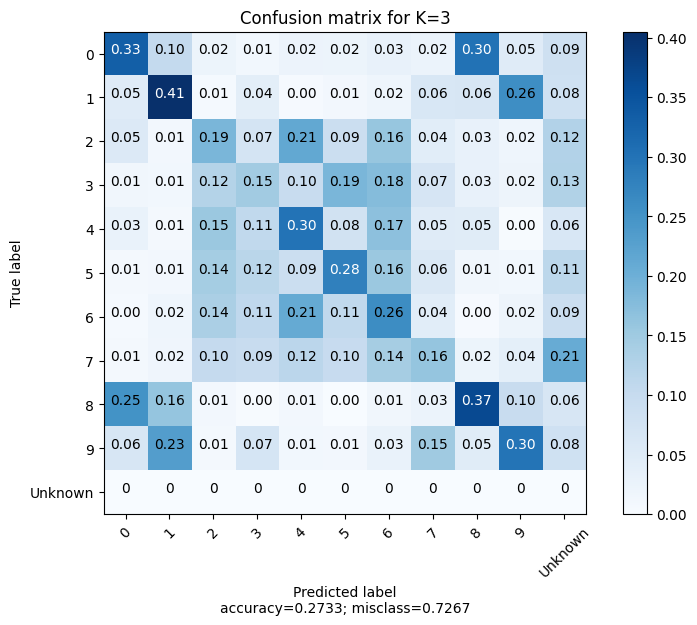

In [ ]:
num_calibration_samples = 1000  # @param {type:"integer"}
calibration = model.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1,
    matcher='match_majority_vote',
    k=3
)

matches = model.match(x_confusion, cutpoint=cutpoint, no_match_label=10)
cm = tfsim_visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusion matrix for K=3"
)

32/32 [==============================] - 0s 12ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 2864.47it/s]



 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.493595   0.0584952     0.335656  0.932258              0.289  0.493595
313/313 [==============================] - 4s 12ms/step


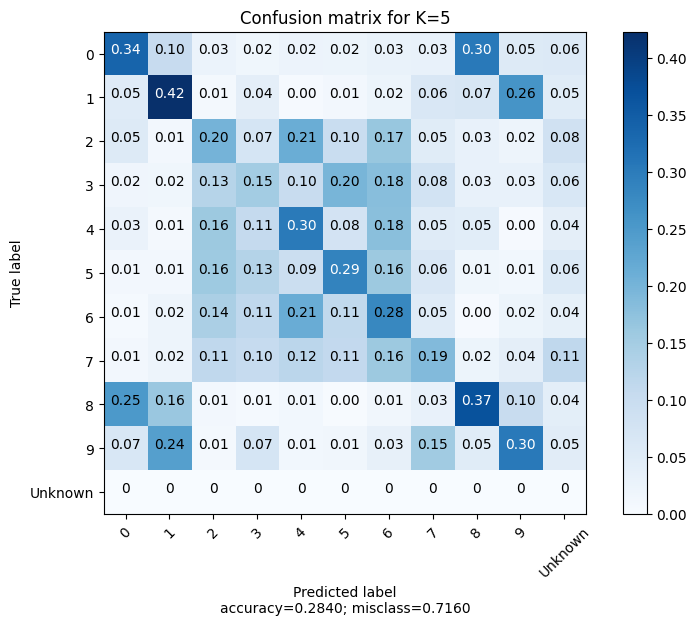

In [ ]:
num_calibration_samples = 1000  # @param {type:"integer"}
calibration = model.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1,
    matcher='match_majority_vote',
    k=5
)

matches = model.match(x_confusion, cutpoint=cutpoint, no_match_label=10)
cm = tfsim_visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusion matrix for K=5"
)